# Analyzing Access to Health Care Services

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Access to health care services is defined as "the timely use of personal health services to achieve the best health outcomes." (Millman M, 1993). Having or not having access to health care services can have a great impact on a person's physical and mental health, and consequently affect a person's quality of life. More broadly it has an effect on the public health of a given society.



Access to health care services requires: being able to find health care services within a specific geographic area, having insurance coverage, finding a good health care provider and other factors. This project will focus on studying select disparate geographic regions in the United States to discover similarities and differences as it relates to being able to access health care services. Specifically, the project will focus on answering the questions: Are there certain regions that have better access to health care services than others? What are the shared characteristics of these regions that make them have better or worse access to health care services? For example, anecdotal evidence appears to indicate low income neighborhoods often have fewer health care providers, hospitals and other health care resources than areas with higher income. This project will use available data to attempt to answer these questions more definitively.

The answer to these questions could provide valuable insights to public health officials. The hope is this information would be useful in guiding policy related to expanding health care services to areas that really need it. 

## Data <a name="data"></a>

This project will use the following data to attempt to answer the questions defined in the introductory section:


* Foursquare API used to obtain health care service provider information for a given geographic location. Specifically, the API will be queried for locations that match specific categories including: Hospitals, Doctor's Offices, Pharmacies, Dentist offices, Urgent care clinics and other medical facilities.


* US Census Bureau population demographics and economic data for a given location. This data will be used to provide additional information on the geographic regions being studied. Data to be used includes household income, population, race, ethnicity, age and other population demographics.

### US Census Data

For the purposes of this project, counties in the Dallas–Fort Worth–Arlington, TX Metropolitan Statistical Area will be studied. This area includes 11 counties and in 2018 had a population of 7,539,711 according to estimates by the U.S. Census Bureau. The 11 Counties include: 

1. Collin County
2. Dallas County
3. Denton County
4. Ellis County
5. Hunt County
6. Kaufman County
7. Rockwall County
8. Johnson County
9. Parker County
10. Tarrant County
11. Wise County

Load the US Census Bureau data including:

* 2018 Population demographics: This dataset includes the total population, sex, age, race and ethnicity data for the eleven counties.
* 2018 Household income: This dataset includes the estimated median household income in 2018 for the eleven counties
* 2018 Economic characteristics: This dataset represents the economic characteristics of the counties in the study and includes: unemployment rate 

This data was obtained from data.gov and is a result of the American Community Survey (ACS) an ongoing survey by the U.S. Census Bureau  

##### First import relevant Python modules to be used in the exploration and analysis of the data

In [451]:
import pandas as pd
import numpy as np
import geocoder
import folium
import requests
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from scipy.stats import pearsonr

In [452]:
# set relevant display settings for notebook
pd.options.display.max_columns = 999
pd.options.display.max_rows = 100
%matplotlib inline 

##### Load 2018 Population demographics

In [453]:
pop_demo_df = pd.read_csv('Data/Pop_Demographics.csv')
pop_demo_df.head()

,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent Estimate!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Percent Estimate!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,Percent Estimate!!SEX AND AGE!!Total population!!Female,Percent Margin of Error!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Percent Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Percent Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!Under 5 years,Margin of Error!!SEX AND AGE!!Total population!!Under 5 years,Percent Estimate!!SEX AND AGE!!Total population!!Under 5 years,Percent Margin of Error!!SEX AND AGE!!Total population!!Under 5 years,Estimate!!SEX AND AGE!!Total population!!5 to 9 years,Margin of Error!!SEX AND AGE!!Total population!!5 to 9 years,Percent Estimate!!SEX AND AGE!!Total population!!5 to 9 years,Percent Margin of Error!!SEX AND AGE!!Total population!!5 to 9 years,Estimate!!SEX AND AGE!!Total population!!10 to 14 years,Margin of Error!!SEX AND AGE!!Total population!!10 to 14 years,Percent Estimate!!SEX AND AGE!!Total population!!10 to 14 years,Percent Margin of Error!!SEX AND AGE!!Total population!!10 to 14 years,Estimate!!SEX AND AGE!!Total population!!15 to 19 years,Margin of Error!!SEX AND AGE!!Total population!!15 to 19 years,Percent Estimate!!SEX AND AGE!!Total population!!15 to 19 years,Percent Margin of Error!!SEX AND AGE!!Total population!!15 to 19 years,Estimate!!SEX AND AGE!!Total population!!20 to 24 years,Margin of Error!!SEX AND AGE!!Total population!!20 to 24 years,Percent Estimate!!SEX AND AGE!!Total population!!20 to 24 years,Percent Margin of Error!!SEX AND AGE!!Total population!!20 to 24 years,Estimate!!SEX AND AGE!!Total population!!25 to 34 years,Margin of Error!!SEX AND AGE!!Total population!!25 to 34 years,Percent Estimate!!SEX AND AGE!!Total population!!25 to 34 years,Percent Margin of Error!!SEX AND AGE!!Total population!!25 to 34 years,Estimate!!SEX AND AGE!!Total population!!35 to 44 years,Margin of Error!!SEX AND AGE!!Total population!!35 to 44 years,Percent Estimate!!SEX AND AGE!!Total population!!35 to 44 years,Percent Margin of Error!!SEX AND AGE!!Total population!!35 to 44 years,Estimate!!SEX AND AGE!!Total population!!45 to 54 years,Margin of Error!!SEX AND AGE!!Total population!!45 to 54 years,Percent Estimate!!SEX AND AGE!!Total population!!45 to 54 years,Percent Margin of Error!!SEX AND AGE!!Total population!!45 to 54 years,Estimate!!SEX AND AGE!!Total population!!55 to 59 years,Margin of Error!!SEX AND AGE!!Total population!!55 to 59 years,Percent Estimate!!SEX AND AGE!!Total population!!55 to 59 years,Percent Margin of Error!!SEX AND AGE!!Total population!!55 to 59 years,Estimate!!SEX AND AGE!!Total population!!60 to 64 years,Margin of Error!!SEX AND AGE!!Total population!!60 to 64 years,Percent Estimate!!SEX AND AGE!!Total population!!60 to 64 years,Percent Margin of Error!!SEX AND AGE!!Total population!!60 to 64 years,Estimate!!SEX AND AGE!!Total population!!65 to 74 years,Margin of Error!!SEX AND AGE!!Total population!!65 to 74 years,Percent Estimate!!SEX AND AGE!!Total population!!65 to 74 years,Percent Margin of Error!!SEX AND AGE!!Total population!!65 to 74 years,Estimate!!SEX AND AGE!!Total population!!75 to 84 years,Margin of Error!!SEX AND AGE!!Total population!!75 to 84 years,Percent Estimate!!SEX AND AGE!!Total population!!75 to 84 years,Percent Margin of Error!!SEX AND AGE!!Total population

Get relevant columns for analysis

In [454]:
pop_demo_df_short = pop_demo_df[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population',
            'Percent Estimate!!SEX AND AGE!!Total population!!Male',
             'Percent Estimate!!SEX AND AGE!!Total population!!Female',
             'Percent Estimate!!SEX AND AGE!!Total population!!Under 18 years',
             'Percent Estimate!!SEX AND AGE!!Total population!!18 years and over',
             'Percent Estimate!!SEX AND AGE!!Total population!!62 years and over',
             'Percent Estimate!!RACE!!Total population!!One race!!White',
             'Percent Estimate!!RACE!!Total population!!One race!!Black or African American',
             'Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native',
             'Percent Estimate!!RACE!!Total population!!One race!!Asian',
             'Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander',
             'Percent Estimate!!RACE!!Total population!!One race!!Some other race',
             'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)'
            ]].copy()
pop_demo_df_short.columns = ['County','TotalPopulation','PercMale','PercFemale','PercUnder18','Perc18andOver',
                             'Perc62andOver','PercWhite','PercBlack',
                             'PercAmericanNative','PercAsian','PercHawaiian','PercOther','PercHispanicAll']
pop_demo_df_short.set_index('County',inplace=True)
pop_demo_df_short.head()

,TotalPopulation,PercMale,PercFemale,PercUnder18,Perc18andOver,Perc62andOver,PercWhite,PercBlack,PercAmericanNative,PercAsian,PercHawaiian,PercOther,PercHispanicAll
County,,,,,,,,,,,,,
"Collin County, Texas",1005146,49.2,50.8,25.9,74.1,14.0,67.8,10.1,0.5,15.9,0.0,2.6,15.4
"Dallas County, Texas",2637772,49.4,50.6,26.1,73.9,13.6,60.6,22.8,0.5,6.4,0.0,7.4,40.5
"Johnson County, Texas",171361,49.9,50.1,25.9,74.1,16.9,90.1,3.7,0.3,1.2,0.0,2.5,22.0
"Rockwall County, Texas",100657,48.6,51.4,27.0,73.0,15.4,84.4,6.6,0.5,2.1,0.0,3.1,18.0
"Tarrant County, Texas",2084931,48.9,51.1,26.3,73.7,14.3,65.4,16.6,0.8,5.6,0.2,8.0,29.2


##### Load 2018 Household Income

In [455]:
hous_inc_df = pd.read_csv('Data/Household_Income_2018.csv')
hous_inc_df.head()

,id,Geographic Area Name,Estimate!!Median household income in the past 12 months (in 2018 inflation-adjusted dollars),Margin of Error!!Median household income in the past 12 months (in 2018 inflation-adjusted dollars)
0,0500000US48085,"Collin County, Texas",94192,911
1,0500000US48113,"Dallas County, Texas",56854,391
2,0500000US48121,"Denton County, Texas",83376,1008
3,0500000US48139,"Ellis County, Texas",72213,2151
4,0500000US48231,"Hunt County, Texas",51928,1501


Select relevant columns only

In [456]:
hous_inc_df = hous_inc_df.drop(['id',
                  'Margin of Error!!Median household income in the past 12 months (in 2018 inflation-adjusted dollars)'],
                axis=1)
hous_inc_df.columns = ['County','2018MedianHouseholdIncome']
hous_inc_df.set_index('County',inplace=True)
hous_inc_df.head()

,2018MedianHouseholdIncome
County,
"Collin County, Texas",94192
"Dallas County, Texas",56854
"Denton County, Texas",83376
"Ellis County, Texas",72213
"Hunt County, Texas",51928


##### Load 2018 Economic Characteristics

In [457]:
econ_char_df = pd.read_csv('Data/Pop_Economics.csv')
econ_char_df.head()

,id,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Estimate!!EMPLOYMENT STATUS!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force,Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force,Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Percent Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over,Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Percent Estimate!!EMPLOYMENT STATUS!!Fem

In [459]:
econ_char_df_short = econ_char_df[['Geographic Area Name',
                                   'Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate',
                                   'Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage',
                                   'Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families',
                                  ]]
econ_char_df_short.columns = ['County','UnemploymentRate','PercNoHealthInsurance','PercFamiliesBelowPoverty']
econ_char_df_short.set_index('County',inplace=True)
econ_char_df_short.head()

,UnemploymentRate,PercNoHealthInsurance,PercFamiliesBelowPoverty
County,,,
"Collin County, Texas",3.6,11.3,4.5
"Dallas County, Texas",4.3,21.7,10.8
"Johnson County, Texas",3.6,16.5,8.4
"Rockwall County, Texas",5.3,12.5,5.6
"Tarrant County, Texas",4.7,17.2,9.3


#### Merge the three US Bureau datasets

In [460]:
census_data_df = pop_demo_df_short.merge(hous_inc_df,left_index=True, right_index=True)
census_data_df = census_data_df.merge(econ_char_df_short,left_index=True, right_index=True)
census_data_df.head()

,TotalPopulation,PercMale,PercFemale,PercUnder18,Perc18andOver,Perc62andOver,PercWhite,PercBlack,PercAmericanNative,PercAsian,PercHawaiian,PercOther,PercHispanicAll,2018MedianHouseholdIncome,UnemploymentRate,PercNoHealthInsurance,PercFamiliesBelowPoverty
County,,,,,,,,,,,,,,,,,
"Collin County, Texas",1005146,49.2,50.8,25.9,74.1,14.0,67.8,10.1,0.5,15.9,0.0,2.6,15.4,94192,3.6,11.3,4.5
"Dallas County, Texas",2637772,49.4,50.6,26.1,73.9,13.6,60.6,22.8,0.5,6.4,0.0,7.4,40.5,56854,4.3,21.7,10.8
"Johnson County, Texas",171361,49.9,50.1,25.9,74.1,16.9,90.1,3.7,0.3,1.2,0.0,2.5,22.0,62066,3.6,16.5,8.4
"Rockwall County, Texas",100657,48.6,51.4,27.0,73.0,15.4,84.4,6.6,0.5,2.1,0.0,3.1,18.0,94767,5.3,12.5,5.6
"Tarrant County, Texas",2084931,48.9,51.1,26.3,73.7,14.3,65.4,16.6,0.8,5.6,0.2,8.0,29.2,64874,4.7,17.2,9.3


#### Geocode counties

In [461]:
counties = census_data_df.index.values
counties_locations_df = pd.DataFrame(counties,columns=["County"])
counties_locations_df.set_index('County',inplace=True)
counties_locations_df['Latitude'] = 0
counties_locations_df['Longitude'] = 0
for county in counties:
    g = geocoder.osm(county)
    counties_locations_df.loc[county,'Latitude'] = g.lat   
    counties_locations_df.loc[county,'Longitude'] = g.lng
counties_locations_df
#counties_locations_df.to_csv('Data/CountiesLocation.csv',header=True)    

,Latitude,Longitude
County,,
"Collin County, Texas",33.160963,-96.606098
"Dallas County, Texas",32.762040,-96.779007
"Johnson County, Texas",32.376607,-97.356862
"Rockwall County, Texas",32.892346,-96.406699
"Tarrant County, Texas",32.751366,-97.335696
"Ellis County, Texas",32.334783,-96.792023
"Denton County, Texas",33.183879,-97.141342
"Kaufman County, Texas",32.619916,-96.296751
"Hunt County, Texas",33.116157,-96.080892


#### Merge with counties data

In [462]:
census_data_df_with_loc = census_data_df.merge(counties_locations_df,left_index=True, right_index=True)
census_data_df_with_loc.head()

,TotalPopulation,PercMale,PercFemale,PercUnder18,Perc18andOver,Perc62andOver,PercWhite,PercBlack,PercAmericanNative,PercAsian,PercHawaiian,PercOther,PercHispanicAll,2018MedianHouseholdIncome,UnemploymentRate,PercNoHealthInsurance,PercFamiliesBelowPoverty,Latitude,Longitude
County,,,,,,,,,,,,,,,,,,,
"Collin County, Texas",1005146,49.2,50.8,25.9,74.1,14.0,67.8,10.1,0.5,15.9,0.0,2.6,15.4,94192,3.6,11.3,4.5,33.160963,-96.606098
"Dallas County, Texas",2637772,49.4,50.6,26.1,73.9,13.6,60.6,22.8,0.5,6.4,0.0,7.4,40.5,56854,4.3,21.7,10.8,32.762040,-96.779007
"Johnson County, Texas",171361,49.9,50.1,25.9,74.1,16.9,90.1,3.7,0.3,1.2,0.0,2.5,22.0,62066,3.6,16.5,8.4,32.376607,-97.356862
"Rockwall County, Texas",100657,48.6,51.4,27.0,73.0,15.4,84.4,6.6,0.5,2.1,0.0,3.1,18.0,94767,5.3,12.5,5.6,32.892346,-96.406699
"Tarrant County, Texas",2084931,48.9,51.1,26.3,73.7,14.3,65.4,16.6,0.8,5.6,0.2,8.0,29.2,64874,4.7,17.2,9.3,32.751366,-97.335696


In [463]:
t1 = census_data_df_with_loc.T
t1.to_csv('Data/CountyData.csv')

#### Visualize the county locations on a map

In [522]:
map_reg = folium.Map(location=[32.7762719, -96.7968559], zoom_start=9)

# instantiate a feature group for the incidents in the dataframe
county_features = folium.map.FeatureGroup()

# loop through the counties and add each to the counties feature group
for lat, lng, cnty in zip(census_data_df_with_loc.Latitude, 
                         census_data_df_with_loc.Longitude,
                         census_data_df_with_loc.index):
    county_features.add_child(
        folium.Marker(
            [lat, lng],
            icon=folium.Icon(color='red', icon='info-sign'),
            popup=cnty,
            tooltip= cnty
        )
    )

# add county to map
map_reg.add_child(county_features)
map_reg

### Foursquare Data

The Foursquare API will be used to retrieve data regarding different categories of health care service providers within a specific radius of the center of a given county.

#### Determine a radius around the center of the county with the least amount of overlap

In [523]:
map_reg = folium.Map(location=[32.7762719, -96.7968559], zoom_start=9)

# instantiate a feature group for the counties in the dataframe
county_features = folium.map.FeatureGroup()

# loop through the counties and add each to the counties feature group
for lat, lng, cnty in zip(census_data_df_with_loc.Latitude, 
                         census_data_df_with_loc.Longitude,
                         census_data_df_with_loc.index):
    county_features.add_child(
        folium.Marker(
            [lat, lng],
            icon=folium.Icon(color='red', icon='info-sign'),
            popup=cnty,
            tooltip= cnty
        )
    )
    county_features.add_child(
        folium.Circle(
            [lat, lng],
            radius=25000,
            color='crimson',
            fill=False
        )
    )

# add county to map
map_reg.add_child(county_features)
map_reg

After a number of tries a radius of 25,000 meters seemed to have the least amount of overlap while covering most of the counties area

#### Get health care providers  within the 25,000 meter radius around the center of the county

In [466]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20190101' # Foursquare API version

In [467]:
def get_categories(categories):
    cat_list = []
    for cat in categories:
        cat_list.append(cat['name'])
    return ", ".join(cat_list)
#     return [(cat['name']) for cat in categories]

In [468]:
def explore_venue(name,lat, lon, category,offset=0,venues_list = []):
#     if(len(venues_list) != 0):
#         print('venues list1',len(venues_list[0]))
        
    limit = 100
    radius = 20000
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}&offset={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, lat, lon, category, radius,limit, offset)

    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            get_categories(v['venue']['categories'])) for v in results])

    #     if(len(venues_list) != 0):
    #         print('venues list2',len(venues_list[0]))

        if len(results) < limit:
    #         print('limit reached')
            return venues_list
        else:
            offset = limit + offset
    #         print('recursive call offset={} result count={}'.format(offset,len(results)))
            res1 = explore_venue(name,lat, lon, category,offset,venues_list)
            return res1
    except Exception as ex:
        print('Error for {}'.format(name))
        print(ex)
        return []

In [473]:
results_df = pd.DataFrame(columns=[0, 1, 2, 3, 4])
venues_list = []
# loop through the counties and add each to the counties feature group
for lat, lng, cnty in zip(census_data_df_with_loc.Latitude, 
                         census_data_df_with_loc.Longitude,
                         census_data_df_with_loc.index):
    
    category = '4bf58dd8d48988d104941735' #medical center category
    offset = 0
    res = explore_venue(cnty, lat, lng, category, offset)
    results_data = [item for venue_list in res for item in venue_list]
    results_df = results_df.append(results_data)

results_df.columns = ['County','Venue', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
results_df.head()

,County,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,"Collin County, Texas",Baylor Scott & White Medical Center - McKinney,33.221343,-96.682312,Medical Center
1,"Collin County, Texas",Carter BloodCare,33.102058,-96.701337,Medical Center
2,"Collin County, Texas",Methodist Richardson Medical Group,32.996127,-96.665994,Medical Center
3,"Collin County, Texas",Medical Center of McKinney,33.160292,-96.637047,Medical Center
4,"Collin County, Texas",Village Health Partners – Independence Medical...,33.088033,-96.748360,Doctor's Office


In [475]:
print('Rows and columns of Foursquare results',results_df.shape)

Rows and columns of Foursquare results (13355, 5)


#### Drop duplicates

In some cases the results are duplicated. Drop the duplicates to avoid double counting.

In [476]:
results_df = results_df.drop_duplicates()
print('Rows and columns of Foursquare results after dropping duplicates',results_df.shape)
results_df.head()

Rows and columns of Foursquare results after dropping duplicates (1470, 5)


,County,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,"Collin County, Texas",Baylor Scott & White Medical Center - McKinney,33.221343,-96.682312,Medical Center
1,"Collin County, Texas",Carter BloodCare,33.102058,-96.701337,Medical Center
2,"Collin County, Texas",Methodist Richardson Medical Group,32.996127,-96.665994,Medical Center
3,"Collin County, Texas",Medical Center of McKinney,33.160292,-96.637047,Medical Center
4,"Collin County, Texas",Village Health Partners – Independence Medical...,33.088033,-96.748360,Doctor's Office


#### Visualize providers on a map

In [477]:
map_reg = folium.Map(location=[32.7762719, -96.7968559], zoom_start=9)

# instantiate a feature group for the counties in the dataframe
county_features = folium.map.FeatureGroup()

# loop through the counties and add each to the counties feature group
for lat, lng, cnty in zip(census_data_df_with_loc.Latitude, 
                         census_data_df_with_loc.Longitude,
                         census_data_df_with_loc.index):
    county_features.add_child(
        folium.Marker(
            [lat, lng],
            icon=folium.Icon(color='red', icon='info-sign'),
            popup=cnty,
            tooltip= cnty
        )
    )
    county_features.add_child(
        folium.Circle(
            [lat, lng],
            radius=20000,
            color='crimson',
            fill=False
        )
    )

# add county to map
map_reg.add_child(county_features)

# instantiate a feature group for the venues in the dataframe
venues_features = folium.map.FeatureGroup()

# loop through the venues and add each to the counties feature group
temp_cnty = results_df
for lat, lng, ven in zip(temp_cnty.VenueLatitude, 
                         temp_cnty.VenueLongitude,
                         temp_cnty.Venue):
    county_features.add_child(
        folium.Circle(
            [lat, lng],
            radius=0.5,
            color='#3186cc',
            fill=True,
            fill_color='#3186cc',
            tooltip= ven
        )
    )
    
map_reg.add_child(venues_features)

# display map
map_reg

In [478]:
venues_grouped_df = pd.DataFrame(
    {'VenueCount' : results_df.groupby( [ 'County','VenueCategory'] ).size()}).reset_index()
venues_grouped_df.head()

,County,VenueCategory,VenueCount
0,"Collin County, Texas",Assisted Living,1
1,"Collin County, Texas",Chiropractor,5
2,"Collin County, Texas",Dentist's Office,12
3,"Collin County, Texas",Doctor's Office,45
4,"Collin County, Texas",Emergency Room,3


In [479]:
venues_grouped_pvt_df = venues_grouped_df.pivot(index='County', columns='VenueCategory')['VenueCount']
venues_grouped_pvt_df.fillna(0,inplace=True)
venues_grouped_pvt_df.columns = venues_grouped_pvt_df.columns.get_level_values(0)
venues_grouped_pvt_df.columns = [''.join(col).strip() for col in venues_grouped_pvt_df.columns.values]
venues_grouped_pvt_df.head()

,Acupuncturist,Alternative Healer,Assisted Living,Building,Business Center,Chiropractor,Daycare,Dentist's Office,Doctor's Office,Emergency Room,Eye Doctor,Gym / Fitness Center,Health & Beauty Service,Hospital,Laboratory,Library,Maternity Clinic,Medical Center,Medical Lab,Medical School,Medical Supply Store,Mental Health Office,Middle School,Miscellaneous Shop,Office,Optical Shop,Pet Service,Pet Store,Pharmacy,Physical Therapist,Rehab Center,Spa,Urgent Care Center,Veterinarian,Weight Loss Center
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Collin County, Texas",0.0,0.0,1.0,0.0,0.0,5.0,0.0,12.0,45.0,3.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,22.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,0.0,2.0,7.0,0.0,1.0,0.0,4.0,18.0,0.0
"Dallas County, Texas",0.0,0.0,1.0,1.0,0.0,9.0,0.0,17.0,63.0,9.0,5.0,0.0,2.0,37.0,0.0,0.0,0.0,52.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,5.0,0.0,2.0,2.0,0.0,0.0,2.0,3.0,15.0,1.0
"Denton County, Texas",1.0,1.0,0.0,1.0,1.0,13.0,0.0,17.0,70.0,3.0,3.0,0.0,0.0,14.0,0.0,1.0,0.0,28.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,0.0,1.0,3.0,6.0,1.0,0.0,2.0,11.0,1.0
"Ellis County, Texas",0.0,2.0,1.0,0.0,0.0,7.0,0.0,23.0,62.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,23.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,0.0
"Hunt County, Texas",0.0,0.0,0.0,0.0,0.0,2.0,0.0,16.0,29.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,24.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0


Drop columns with few venues and drop non medical venues.

In [480]:
venues_grouped_pvt_df = venues_grouped_pvt_df.drop(['Acupuncturist', 'Alternative Healer', 
                                                    'Assisted Living', 'Building',
                                                    'Gym / Fitness Center', 'Health & Beauty Service',
                                                    'Health & Beauty Service','Laboratory', 'Library', 
                                                    'Medical Lab', 'Medical School', 'Medical Supply Store',
                                                   'Mental Health Office', 'Middle School', 'Miscellaneous Shop', 'Office',
                                                   'Optical Shop', 'Pet Service', 'Pet Store', 
                                                    'Veterinarian', 'Weight Loss Center',
                                                   'Business Center', 'Chiropractor', 'Daycare'],axis=1)
venues_grouped_pvt_df.head()

,Dentist's Office,Doctor's Office,Emergency Room,Eye Doctor,Hospital,Maternity Clinic,Medical Center,Pharmacy,Physical Therapist,Rehab Center,Spa,Urgent Care Center
County,,,,,,,,,,,,
"Collin County, Texas",12.0,45.0,3.0,1.0,6.0,0.0,22.0,7.0,0.0,1.0,0.0,4.0
"Dallas County, Texas",17.0,63.0,9.0,5.0,37.0,0.0,52.0,2.0,0.0,0.0,2.0,3.0
"Denton County, Texas",17.0,70.0,3.0,3.0,14.0,0.0,28.0,3.0,6.0,1.0,0.0,2.0
"Ellis County, Texas",23.0,62.0,1.0,2.0,4.0,1.0,23.0,0.0,3.0,1.0,0.0,1.0
"Hunt County, Texas",16.0,29.0,0.0,0.0,4.0,0.0,24.0,0.0,1.0,1.0,0.0,0.0


Add a totals column

In [482]:
venues_grouped_pvt_df['TotalMedicalCenters'] = venues_grouped_pvt_df.sum(axis=1)
venues_grouped_pvt_df.head()

,Dentist's Office,Doctor's Office,Emergency Room,Eye Doctor,Hospital,Maternity Clinic,Medical Center,Pharmacy,Physical Therapist,Rehab Center,Spa,Urgent Care Center,TotalMedicalCenters
County,,,,,,,,,,,,,
"Collin County, Texas",12.0,45.0,3.0,1.0,6.0,0.0,22.0,7.0,0.0,1.0,0.0,4.0,101.0
"Dallas County, Texas",17.0,63.0,9.0,5.0,37.0,0.0,52.0,2.0,0.0,0.0,2.0,3.0,190.0
"Denton County, Texas",17.0,70.0,3.0,3.0,14.0,0.0,28.0,3.0,6.0,1.0,0.0,2.0,147.0
"Ellis County, Texas",23.0,62.0,1.0,2.0,4.0,1.0,23.0,0.0,3.0,1.0,0.0,1.0,121.0
"Hunt County, Texas",16.0,29.0,0.0,0.0,4.0,0.0,24.0,0.0,1.0,1.0,0.0,0.0,75.0


### Merge Foursquare venues data with US Census data

In [484]:
census_4sq_combined = census_data_df_with_loc.merge(venues_grouped_pvt_df,left_index=True, right_index=True)
census_4sq_combined.head()

,TotalPopulation,PercMale,PercFemale,PercUnder18,Perc18andOver,Perc62andOver,PercWhite,PercBlack,PercAmericanNative,PercAsian,PercHawaiian,PercOther,PercHispanicAll,2018MedianHouseholdIncome,UnemploymentRate,PercNoHealthInsurance,PercFamiliesBelowPoverty,Latitude,Longitude,Dentist's Office,Doctor's Office,Emergency Room,Eye Doctor,Hospital,Maternity Clinic,Medical Center,Pharmacy,Physical Therapist,Rehab Center,Spa,Urgent Care Center,TotalMedicalCenters
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Collin County, Texas",1005146,49.2,50.8,25.9,74.1,14.0,67.8,10.1,0.5,15.9,0.0,2.6,15.4,94192,3.6,11.3,4.5,33.160963,-96.606098,12.0,45.0,3.0,1.0,6.0,0.0,22.0,7.0,0.0,1.0,0.0,4.0,101.0
"Dallas County, Texas",2637772,49.4,50.6,26.1,73.9,13.6,60.6,22.8,0.5,6.4,0.0,7.4,40.5,56854,4.3,21.7,10.8,32.762040,-96.779007,17.0,63.0,9.0,5.0,37.0,0.0,52.0,2.0,0.0,0.0,2.0,3.0,190.0
"Johnson County, Texas",171361,49.9,50.1,25.9,74.1,16.9,90.1,3.7,0.3,1.2,0.0,2.5,22.0,62066,3.6,16.5,8.4,32.376607,-97.356862,21.0,32.0,2.0,2.0,5.0,1.0,14.0,1.0,2.0,0.0,0.0,1.0,81.0
"Rockwall County, Texas",100657,48.6,51.4,27.0,73.0,15.4,84.4,6.6,0.5,2.1,0.0,3.1,18.0,94767,5.3,12.5,5.6,32.892346,-96.406699,23.0,19.0,3.0,2.0,3.0,0.0,26.0,0.0,2.0,3.0,0.0,3.0,84.0
"Tarrant County, Texas",2084931,48.9,51.1,26.3,73.7,14.3,65.4,16.6,0.8,5.6,0.2,8.0,29.2,64874,4.7,17.2,9.3,32.751366,-97.335696,9.0,36.0,4.0,4.0,18.0,0.0,38.0,0.0,3.0,0.0,0.0,2.0,114.0


### Calculate Dependent Variable: Ratio of People to Medical Centers

For the purposes of this study, the measure of access to health care services was defined as the ratio of population in a defined region to total health care services available in the area. The total health care services in the region is the sum of all different categories of medical centers gathered through the Foursquare API.  A low ratio of people to medical centers indicates higher access to care, meaning the population has more options available for care.  This measure which was named “PeopleToMedicalCenters” was chosen as the dependent variable of the study.

In [486]:
census_4sq_combined['PeopleToMedicalCenters'] = (census_4sq_combined['TotalPopulation']
                                                 /census_4sq_combined['TotalMedicalCenters'])
census_4sq_combined.head()

,TotalPopulation,PercMale,PercFemale,PercUnder18,Perc18andOver,Perc62andOver,PercWhite,PercBlack,PercAmericanNative,PercAsian,PercHawaiian,PercOther,PercHispanicAll,2018MedianHouseholdIncome,UnemploymentRate,PercNoHealthInsurance,PercFamiliesBelowPoverty,Latitude,Longitude,Dentist's Office,Doctor's Office,Emergency Room,Eye Doctor,Hospital,Maternity Clinic,Medical Center,Pharmacy,Physical Therapist,Rehab Center,Spa,Urgent Care Center,TotalMedicalCenters,PeopleToMedicalCenters
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Collin County, Texas",1005146,49.2,50.8,25.9,74.1,14.0,67.8,10.1,0.5,15.9,0.0,2.6,15.4,94192,3.6,11.3,4.5,33.160963,-96.606098,12.0,45.0,3.0,1.0,6.0,0.0,22.0,7.0,0.0,1.0,0.0,4.0,101.0,9951.940594
"Dallas County, Texas",2637772,49.4,50.6,26.1,73.9,13.6,60.6,22.8,0.5,6.4,0.0,7.4,40.5,56854,4.3,21.7,10.8,32.762040,-96.779007,17.0,63.0,9.0,5.0,37.0,0.0,52.0,2.0,0.0,0.0,2.0,3.0,190.0,13883.010526
"Johnson County, Texas",171361,49.9,50.1,25.9,74.1,16.9,90.1,3.7,0.3,1.2,0.0,2.5,22.0,62066,3.6,16.5,8.4,32.376607,-97.356862,21.0,32.0,2.0,2.0,5.0,1.0,14.0,1.0,2.0,0.0,0.0,1.0,81.0,2115.567901
"Rockwall County, Texas",100657,48.6,51.4,27.0,73.0,15.4,84.4,6.6,0.5,2.1,0.0,3.1,18.0,94767,5.3,12.5,5.6,32.892346,-96.406699,23.0,19.0,3.0,2.0,3.0,0.0,26.0,0.0,2.0,3.0,0.0,3.0,84.0,1198.297619
"Tarrant County, Texas",2084931,48.9,51.1,26.3,73.7,14.3,65.4,16.6,0.8,5.6,0.2,8.0,29.2,64874,4.7,17.2,9.3,32.751366,-97.335696,9.0,36.0,4.0,4.0,18.0,0.0,38.0,0.0,3.0,0.0,0.0,2.0,114.0,18288.868421


#### Categorize the ratio of People to Medical Centers into high medium low

In [487]:
group_names = np.array(['low', 'medium', 'high']) 
bins = np.linspace(census_4sq_combined['PeopleToMedicalCenters'].min(),
                census_4sq_combined['PeopleToMedicalCenters'].max(), 4)
census_4sq_combined['PeopleToMedicalCentersCat'] = pd.cut(census_4sq_combined['PeopleToMedicalCenters'], bins, labels = group_names, include_lowest = True)


In [520]:
census_4sq_combined['PeopleToMedicalCentersCat'] .value_counts()

low       8
high      2
medium    1
Name: PeopleToMedicalCentersCat, dtype: int64

## Methodology <a name="methodology"></a>

The objective of this study was to answer the questions: Are there certain regions that have better access to health care services than others? What are the shared characteristics of these regions that make them have better or worse access to health care services? 


For the purposes of this study, the measure of access to health care services was defined as the ratio of population in a defined region to total health care services available in the area. The total health care services in the region is the sum of all different categories of medical centers gathered through the Foursquare API.  A low ratio of people to medical centers indicates higher access to care, meaning the population has more options available for care.  This ratio served as the target variable for the study. For further clarity the formula is shown below.


The ratio of people to medical centers = Total Population in County / Sum of Medical Centers in county


Data from the US Census Bureau provided population economic and demographic characteristics by county. The Foursquare API was then used to obtain data on different categories of health care services within a defined radius of 25,000 meters. These two datasets were then combined to provide independent variable to be analyzed against the target variable defined above.


The tools selected to understand the relationship between the ratio of people to medical centers and the economic and demographic characteristics of a county were correlation analysis, multiple linear regression and decision trees.

## Analysis  <a name="analysis"></a>

#### Select Features

In [488]:
reg_df = census_4sq_combined[['PeopleToMedicalCenters','PeopleToMedicalCentersCat',
                              'PercMale', 'PercFemale', 'PercUnder18',
                               'Perc18andOver', 'Perc62andOver', 'PercWhite', 'PercBlack',
                               'PercAmericanNative', 'PercAsian', 'PercHawaiian', 'PercOther',
                               'PercHispanicAll', '2018MedianHouseholdIncome', 'UnemploymentRate',
                               'PercNoHealthInsurance', 'PercFamiliesBelowPoverty']]
reg_df.head()

,PeopleToMedicalCenters,PeopleToMedicalCentersCat,PercMale,PercFemale,PercUnder18,Perc18andOver,Perc62andOver,PercWhite,PercBlack,PercAmericanNative,PercAsian,PercHawaiian,PercOther,PercHispanicAll,2018MedianHouseholdIncome,UnemploymentRate,PercNoHealthInsurance,PercFamiliesBelowPoverty
County,,,,,,,,,,,,,,,,,,
"Collin County, Texas",9951.940594,medium,49.2,50.8,25.9,74.1,14.0,67.8,10.1,0.5,15.9,0.0,2.6,15.4,94192,3.6,11.3,4.5
"Dallas County, Texas",13883.010526,high,49.4,50.6,26.1,73.9,13.6,60.6,22.8,0.5,6.4,0.0,7.4,40.5,56854,4.3,21.7,10.8
"Johnson County, Texas",2115.567901,low,49.9,50.1,25.9,74.1,16.9,90.1,3.7,0.3,1.2,0.0,2.5,22.0,62066,3.6,16.5,8.4
"Rockwall County, Texas",1198.297619,low,48.6,51.4,27.0,73.0,15.4,84.4,6.6,0.5,2.1,0.0,3.1,18.0,94767,5.3,12.5,5.6
"Tarrant County, Texas",18288.868421,high,48.9,51.1,26.3,73.7,14.3,65.4,16.6,0.8,5.6,0.2,8.0,29.2,64874,4.7,17.2,9.3


#### Explore the data

In [489]:
# View summary statistics
reg_df.describe()

,PeopleToMedicalCenters,PercMale,PercFemale,PercUnder18,Perc18andOver,Perc62andOver,PercWhite,PercBlack,PercAmericanNative,PercAsian,PercHawaiian,PercOther,PercHispanicAll,2018MedianHouseholdIncome,UnemploymentRate,PercNoHealthInsurance,PercFamiliesBelowPoverty
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,5277.349045,49.300000,50.700000,25.781818,74.218182,16.136364,79.136364,9.636364,0.736364,4.090909,0.072727,3.645455,22.100000,71090.363636,4.454545,15.790909,7.036364
std,6076.826204,0.469042,0.469042,1.169460,1.169460,2.535063,10.982465,6.259756,0.461027,4.889060,0.090453,2.547691,7.720363,14385.465632,1.053910,3.166845,2.325198
min,1098.182540,48.600000,50.000000,23.900000,72.200000,12.900000,60.600000,1.600000,0.300000,0.000000,0.000000,0.400000,12.800000,51928.000000,3.300000,11.100000,4.300000
25%,1300.065513,49.050000,50.400000,24.700000,73.550000,14.150000,70.700000,5.150000,0.500000,1.000000,0.000000,2.200000,17.500000,61887.500000,3.600000,13.900000,5.050000
50%,1587.925926,49.300000,50.700000,25.900000,74.100000,15.500000,81.400000,10.100000,0.500000,1.600000,0.000000,2.600000,19.700000,65390.000000,4.300000,16.500000,6.400000
75%,7897.956692,49.600000,50.950000,26.450000,75.300000,18.100000,87.250000,11.600000,1.000000,6.000000,0.150000,5.250000,24.500000,79000.500000,4.900000,17.100000,8.850000
max,18288.868421,50.000000,51.400000,27.800000,76.100000,20.200000,93.600000,22.800000,1.700000,15.900000,0.200000,8.000000,40.500000,94767.000000,6.900000,21.700000,10.800000


### Correlation Analysis

In [512]:
# View Correlation
corr = reg_df.corr()['PeopleToMedicalCenters'].sort_values(ascending=False)
corr_df = corr.to_frame()
corr_df.columns = ['Correlation to PeopleToMedicalCenters']
corr_df

,Correlation to PeopleToMedicalCenters
PeopleToMedicalCenters,1.000000
PercBlack,0.758471
PercOther,0.682679
PercHispanicAll,0.608594
PercAsian,0.597868
PercFamiliesBelowPoverty,0.381150
PercFemale,0.229905
PercNoHealthInsurance,0.201154
PercUnder18,0.138546
PercHawaiian,0.125324


#### Correlation observations

Race seems to have a strong correlation with the target variable PeopleToMedicalCenters. As the percent of black, hispanic, asian people increases so does the ratio of people to medical centers. Conversely as the percent of white people increases the ratio of people to medical centers decreases. 

Other less prominent but important variables were: 

Percent of people 62 years and older. As the percent of people 62 years and older increases the ratio of people to medical centers decreases. 

Percent of families below the poverty level. As the percent of families below poverty increases so does the ratio of people to medical centers.

Percent of people with no health insurance. As the percent of people with no health insurance increases so does the ratio of people to medical centers.

Percent of males and females. As the percent of males increases the ratio of people to medical centers decreases. Conversely as the percent of females increases so does the ratio of people to medical centers.


### Multiple linear regression

Perform Multiple linear regression to attempt to understand the relationship between the dependent variable, PeopleToMedicalCenters and the selected economic and demographic characteristics of the counties.

In [516]:
regr = linear_model.LinearRegression()
features = ['PercMale', 'PercFemale', 'PercUnder18',
           'Perc18andOver', 'Perc62andOver', 'PercWhite', 'PercBlack',
           'PercAmericanNative', 'PercAsian', 'PercHawaiian', 'PercOther',
           'PercHispanicAll', '2018MedianHouseholdIncome', 'UnemploymentRate',
           'PercNoHealthInsurance', 'PercFamiliesBelowPoverty']
x = reg_df[features]
y = reg_df['PeopleToMedicalCenters']
regr.fit (x, y)
# The coefficients

coeff_df = pd.DataFrame(regr.coef_, features, columns=['Coefficient'])  
coeff_df.sort_values(by='Coefficient', ascending=False)

# coef_dict = {}
# for coef, feat in zip(regr.coef_, features):
#     coef_dict[feat] = coef
# print(list(zip(regr.coef_, features)))


,Coefficient
PercNoHealthInsurance,2820.645487
PercHawaiian,2321.243105
UnemploymentRate,2197.381495
PercUnder18,1885.544236
PercFemale,1195.724673
2018MedianHouseholdIncome,-0.449435
PercHispanicAll,-155.923479
PercOther,-693.850425
PercAmericanNative,-923.354811
PercMale,-1195.724673


#### Multiple linear regression observations

The resulting coefficient values should be interpreted to mean for every unit increase in an independent variable, there's an increase or decrease in the value of the independent variable.

The variables with the most significant positive impact on the value of the dependent variable (PeopleToMedicalCenters) are percent of people with no health insurance, percent of people of the Hawaiian race, percent unemployed. For example, a 1% increase in percent of people with no health insurance results in a 2820.645487 increase in PeopleToMedicalCenters.

The variables with the most significant negative impact on the value of the dependent variable (PeopleToMedicalCenters) are percent of black people, percent of white people, percent of people 62 and over and percent of families below poverty level. Meaning a unit increase results in a decrease in PeopleToMedicalCenters. For example, a 1% increase in the percent of people 62 and over results in a 2878.634517 decrease in PeopleToMedicalCenters.

### Decision tree classification model 

Build a decision tree classification model to attempt to understand the relationship between the ratio of people to medical centers and the selected economic and demographic characteristics of the counties. The decision tree classification model requires the independent variable to be a discrete categorical variable. To meet this requirement the continuous variable the ratio of people to medical centers was transformed into three evenly spaced categories named High, Medium and Low. 

In [492]:
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dec_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [493]:
features = ['PercMale', 'PercFemale', 'PercUnder18',
           'Perc18andOver', 'Perc62andOver', 'PercWhite', 'PercBlack',
           'PercAmericanNative', 'PercAsian', 'PercHawaiian', 'PercOther',
           'PercHispanicAll', '2018MedianHouseholdIncome', 'UnemploymentRate',
           'PercNoHealthInsurance', 'PercFamiliesBelowPoverty']
x_dec = reg_df[features]
y_dec = reg_df['PeopleToMedicalCentersCat']

dec_tree.fit(x_dec,y_dec)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

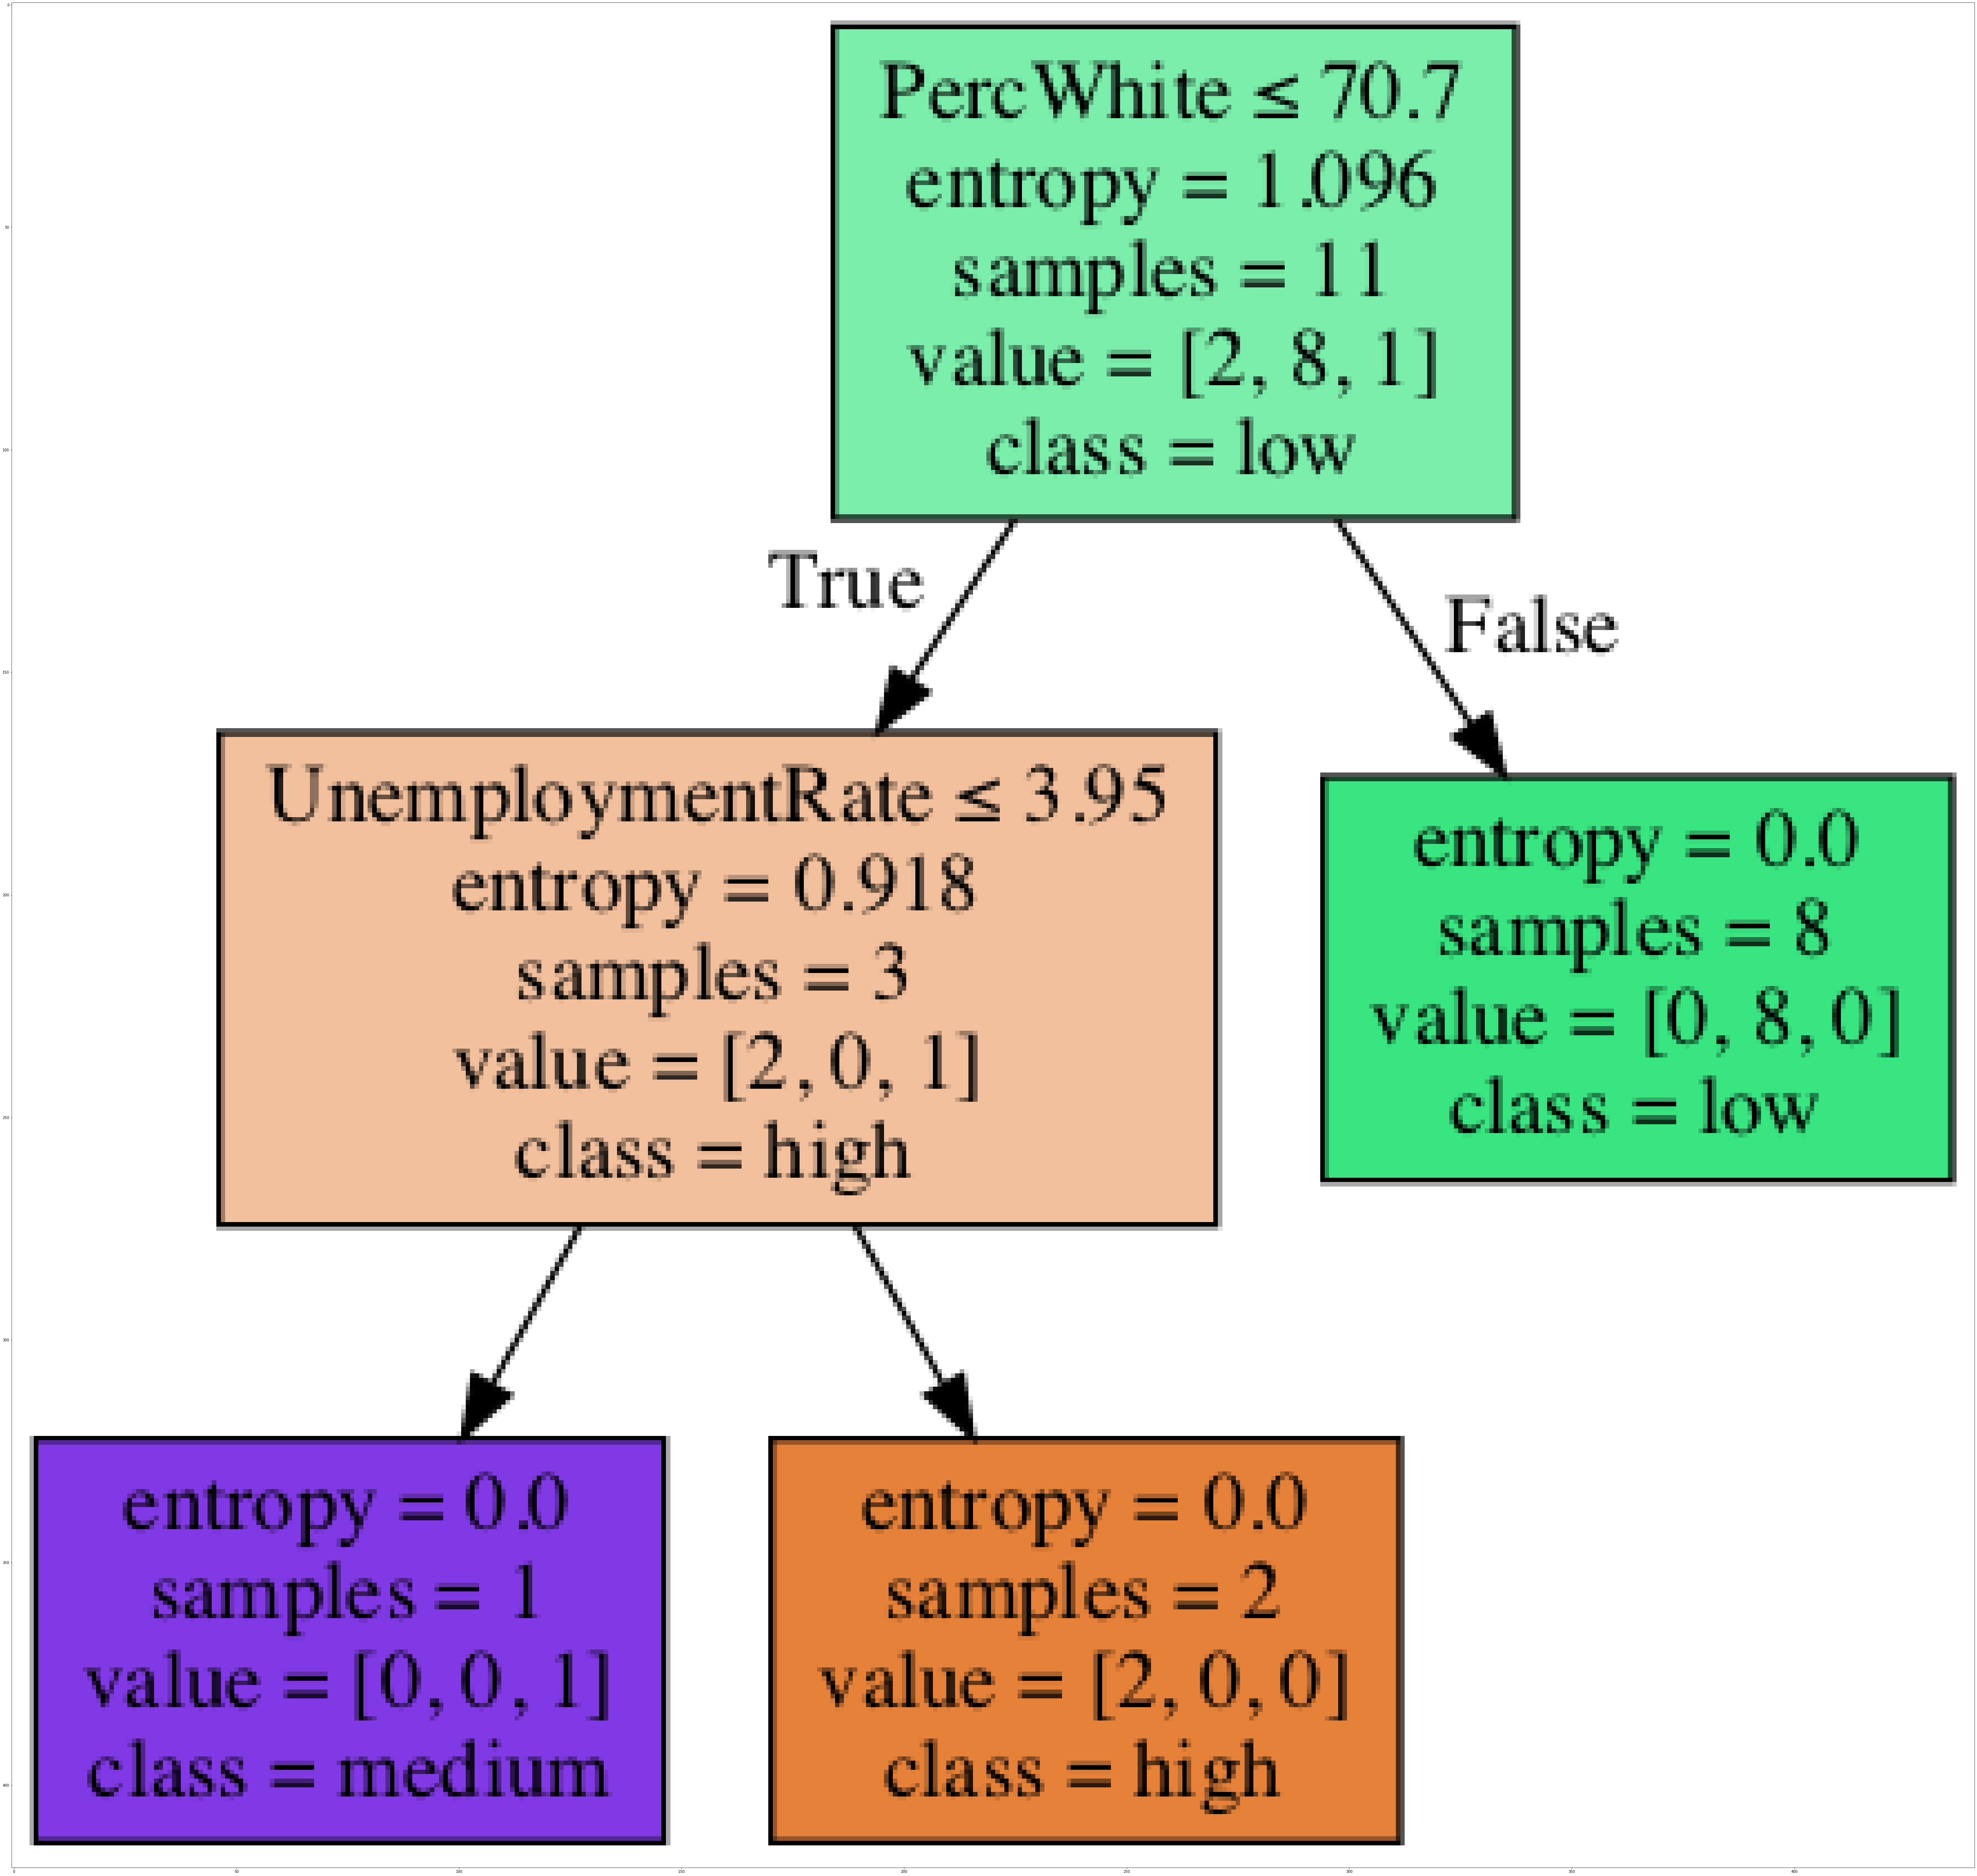

In [494]:
dot_data = StringIO()
filename = "tree.png"
featureNames = features
targetNames = reg_df['PeopleToMedicalCentersCat'].unique().tolist()
out=tree.export_graphviz(dec_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_dec), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#### Decision Tree Classification Model Observations

The most prominent variable identified by the model was the percent of white people in the population. When a population was made up of 70.7% or less of white people, the population was later classified as having a high or medium ratio of people to medical centers. This was further broken down by the next most prominent variable, the unemployment rate. When a population had an unemployment rate of 3.95% or less, the population was classified as having a medium ratio of people to medical centers otherwise it was classified to have a high ratio.

## Results and Discussion <a name="results"></a>

The results of correlation analysis and decision classification model appear to agree that the racial make-up of a county is strongly associated with higher access to health care services for people living in the county. Specifically, for the counties in the study, if a county is largely made up of people classified as white from the US Census Bureau data, the county has a lower ratio of people to medical centers which means higher access to health care services for its population. This information can be used by policy makers to further study the underlying causes and to design intervention efforts to provide higher access for these minority populations. Suggestions would be to look at the relationship between race, unemployment and income.


The results of correlation analysis and multiple linear regression analysis appear to agree that if a county has a larger population of people 62 and older, the county has a lower ratio of people to medical centers which means higher access to health care services for its population. This could be explained by the fact that this population is largely made up of retirees who have Medicare healthcare coverage and are able to afford health care services. This information could be used by policy makers to increase access to insurance coverage that seems to be indirectly associated with higher access to care.


The results of multiple linear regression analysis and decision classification model appear to agree that if a county has a higher unemployment rate, the county has a higher ratio of people to medical centers which means lower access to health care services for its population. It appears to support anecdotal evidence that people that are unemployed and consequently have lower income have lower access to care. Knowing this, policy makers can look for ways to assist people who are unemployed to be able to pay for health care services, which could as a result boost access to health care for a county’s population. 

## Conclusion <a name="conclusion"></a>

In conclusion this limited study provided useful insights that could be used to guide policy changes to ensure everyone has improved access to health care services. The study revealed race, age and unemployment are the primary factors that affect a population’s access to care. In answering the questions posed in the introductory section; Higher access to health care services was associated with counties with a large percent of white people, a large percent of people 62 years and older and lower unemployment rate.


Future studies could improve on this work by expanding the area of study to include a larger number of counties across the United States. The study could also be improved by using other sources to complement the Foursquare API places which in some cases appeared to be incomplete. Other research could also explore the underlying reasons for why these factors have an impact on access to health care services.